In [2]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
# 1. Générer les données
set.seed(123)  # Pour la reproductibilité
donnees <- data.frame(
  X = c(rnorm(50, mean = 0, sd = 1), rnorm(50, mean = 4, sd = 1)),
  Y = c(rnorm(50, mean = 0, sd = 1), rnorm(50, mean = 4, sd = 1))
)


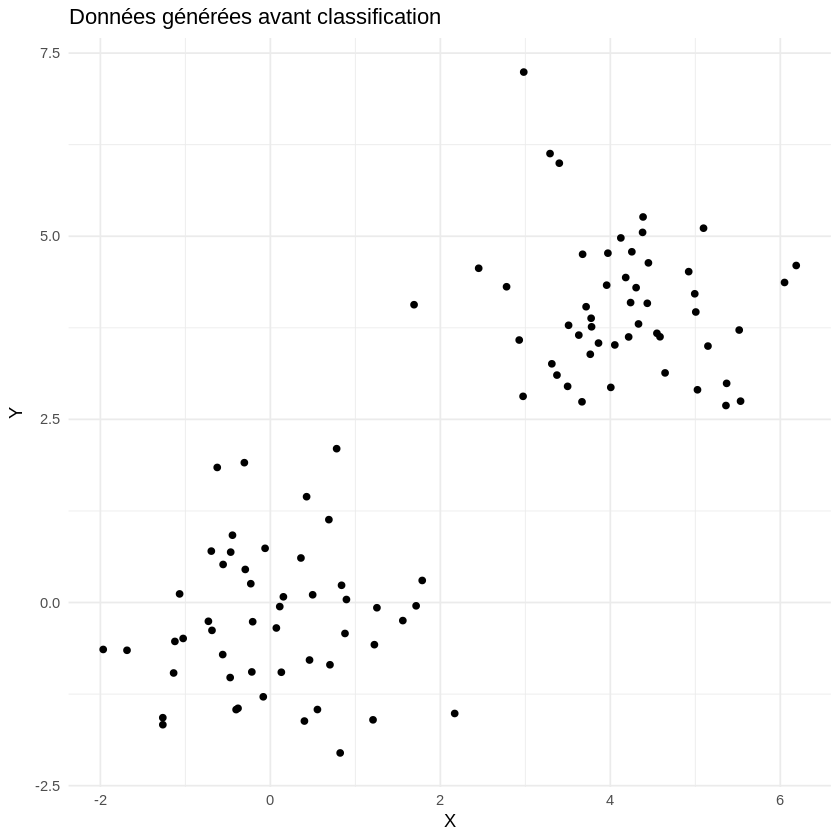

In [5]:
ggplot(donnees, aes(x = X, y = Y)) +
    geom_point() +
    theme_minimal() +
    ggtitle("Données générées avant classification")

# Classification K-Means

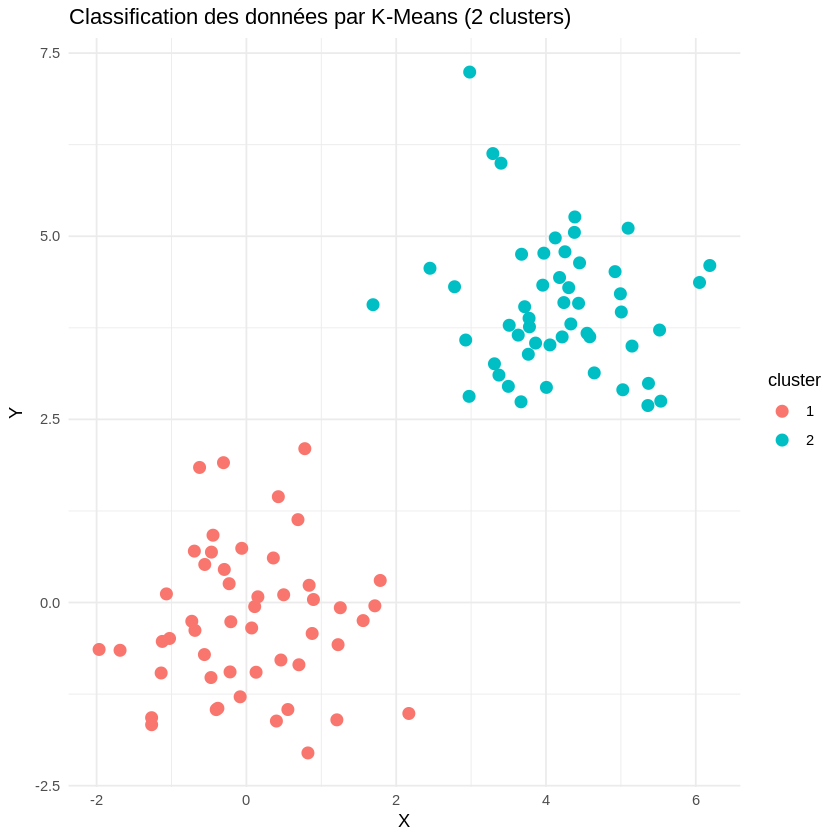

In [6]:
# 2. Appliquer K-Means avec 2 clusters
kmeans_result <- kmeans(donnees, centers = 2)

# 3. Ajouter la colonne 'cluster'
donnees$cluster <- as.factor(kmeans_result$cluster)

# 4. Afficher les données colorées selon les clusters
ggplot(donnees, aes(x = X, y = Y, color = cluster)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle("Classification des données par K-Means (2 clusters)")

# Classification CAH (Clustering Ascendant Hiérarchique)

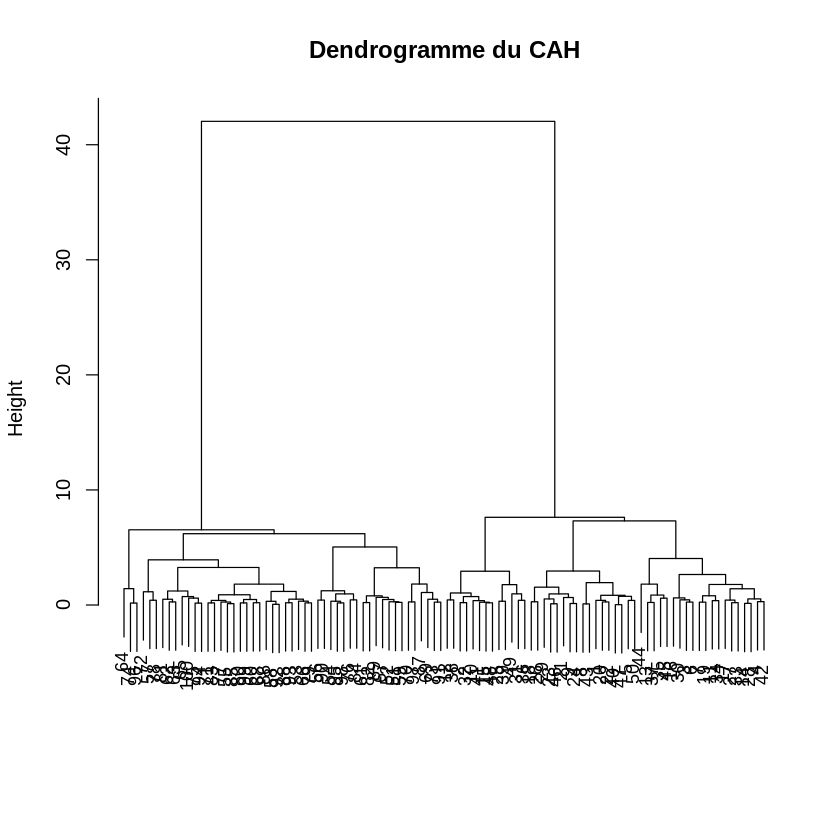

In [9]:
# 1. Calculer la matrice de distances
distance_matrix <- dist(donnees[, c("X", "Y")])

# 2. Appliquer l'algorithme CAH
cah_result <- hclust(distance_matrix, method = "ward.D2")

# 3. Afficher le dendrogramme
plot(cah_result, main = "Dendrogramme du CAH", xlab = "", sub = "", cex = 0.9)

**Distances courantes utilisées dans `dist()`:**

1. **`Euclidean`:** Distance euclidienne classique entre deux points.
2. **`Maximum` (Chebyshev):** Plus grande différence sur n'importe quelle dimension.
3. **`Manhattan`:** Somme des distances absolues sur chaque dimension (aussi appelée distance City Block).
4. **`Canberra`:** Distance sensible aux petites variations et aux valeurs proches de zéro.
5. **`Binary`:** Utilisée pour des données binaires (0/1).
6. **`Minkowski`:** Généralisation de Euclidean et Manhattan avec un paramètre $p$.


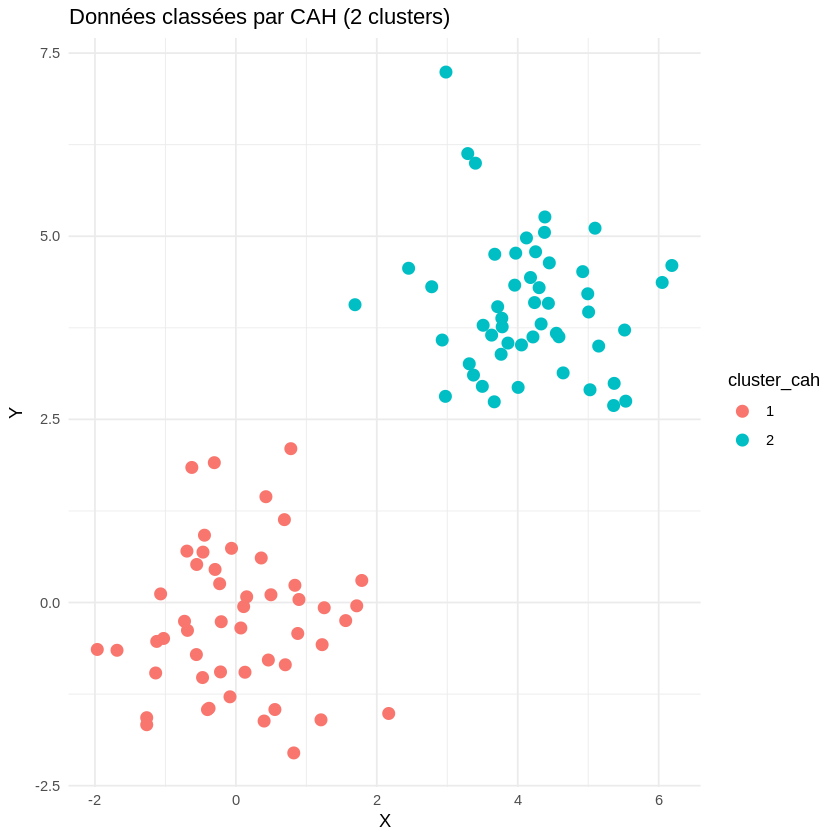

In [11]:
# 1. Diviser le dendrogramme en 2 clusters
cluster_cah <- cutree(cah_result, k = 2)

# 2. Ajouter la colonne de clusters dans le dataframe
donnees$cluster_cah <- as.factor(cluster_cah)

# 3. Afficher les données colorées selon les clusters CAH
ggplot(donnees, aes(x = X, y = Y, color = cluster_cah)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle("Données classées par CAH (2 clusters)")

1. The heights of successive merges in the dendrogram are denoted by \( h_1, h_2, \dots, h_{n-1} \), where \( n \) is the number of observations.

2. Compute the difference (jump) in heights between successive merges:

$$
\Delta_i = h_{i+1} - h_i \quad \text{for} \quad i = 1, 2, \dots, n-2
$$

3. Find the index of the largest jump:

$$
i^* = \arg \max_i \Delta_i
$$

4. The optimal number of clusters \( k \) is given by:

$$
k = n - i^*
$$

where \( n \) is the total number of observations.

Thus, the optimal number of clusters corresponds to the number of merges just before the largest jump occurs.


Largest jump is between merges 98 and 99 
→ Optimal number of clusters k = 2 


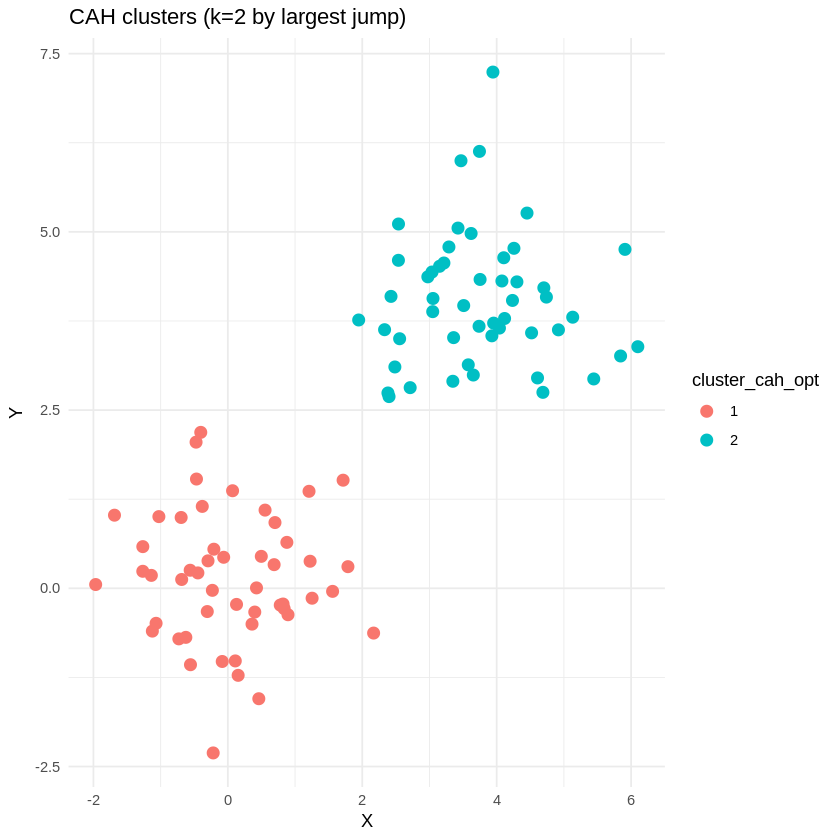

In [18]:
# 1) Hierarchical clustering (you already have this)
distance_matrix <- dist(donnees[, c("X","Y")])
cah_result      <- hclust(distance_matrix, method = "ward.D2")

# 2) Compute the jumps in merge heights
heights     <- cah_result$height
height_diff <- diff(heights)              # Δ_i = h[i+1] - h[i]

# 3) Find the index of the largest jump
i_star <- which.max(height_diff)          # i* in 1:(n-2)

# 4) Compute optimal k
n_obs      <- nrow(donnees)               # n
k_optimal  <- n_obs - i_star

cat("Largest jump is between merges", i_star, "and", i_star+1, "\n")
cat("→ Optimal number of clusters k =", k_optimal, "\n")

# 5) Cut the tree into k_optimal clusters
clusters_opt <- cutree(cah_result, k = k_optimal)
donnees$cluster_cah_opt <- as.factor(clusters_opt)

# 6) Visualize
library(ggplot2)
ggplot(donnees, aes(x = X, y = Y, color = cluster_cah_opt)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle(paste0("CAH clusters (k=", k_optimal, " by largest jump)"))


In [25]:
list.files()

[1] "a1.txt"      "flame.txt"   "s4.txt"      "sample_data" "spiral.txt"

      X     Y
1 54620 43523
2 52694 42750
3 53253 43024
4 54925 42624
5 54973 43980
6 52967 42955
Largest jump is between merges 2998 and 2999 
→ Optimal number of clusters k = 2 


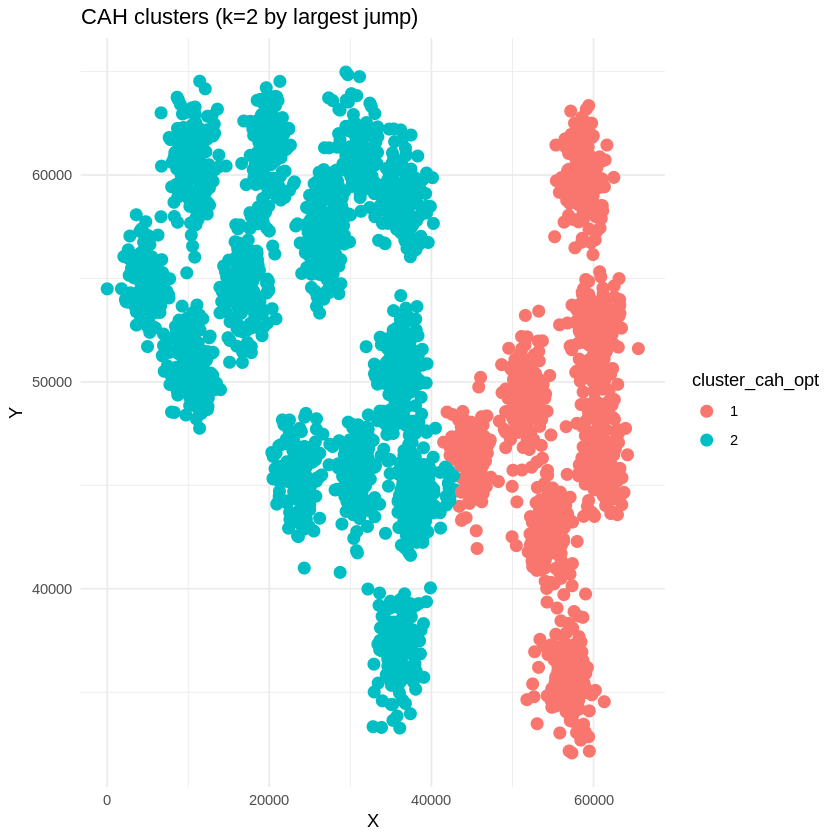

In [27]:
# 1) Read the data from the file (no header)
donnees <- read.table("a1.txt", header = FALSE)

# Manually assign column names for X and Y
colnames(donnees) <- c("X", "Y")

# Display the first few rows to check the data
print(head(donnees))

# 2) Compute the distance matrix using the X and Y columns
distance_matrix <- dist(donnees[, c("X", "Y")])

# Perform hierarchical clustering (CAH)
cah_result <- hclust(distance_matrix, method = "ward.D2")

# 3) Compute the jumps in merge heights
heights <- cah_result$height
height_diff <- diff(heights)  # Δ_i = h[i+1] - h[i]

# 4) Find the index of the largest jump
i_star <- which.max(height_diff)  # i* in 1:(n-2)

# 5) Compute optimal k (number of clusters)
n_obs <- nrow(donnees)  # n (total number of observations)
k_optimal <- n_obs - i_star  # Optimal number of clusters

cat("Largest jump is between merges", i_star, "and", i_star + 1, "\n")
cat("→ Optimal number of clusters k =", k_optimal, "\n")

# 6) Cut the tree into k_optimal clusters
clusters_opt <- cutree(cah_result, k = k_optimal)
donnees$cluster_cah_opt <- as.factor(clusters_opt)

# 7) Visualize the clustering result
library(ggplot2)
ggplot(donnees, aes(x = X, y = Y, color = cluster_cah_opt)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle(paste0("CAH clusters (k=", k_optimal, " by largest jump)"))


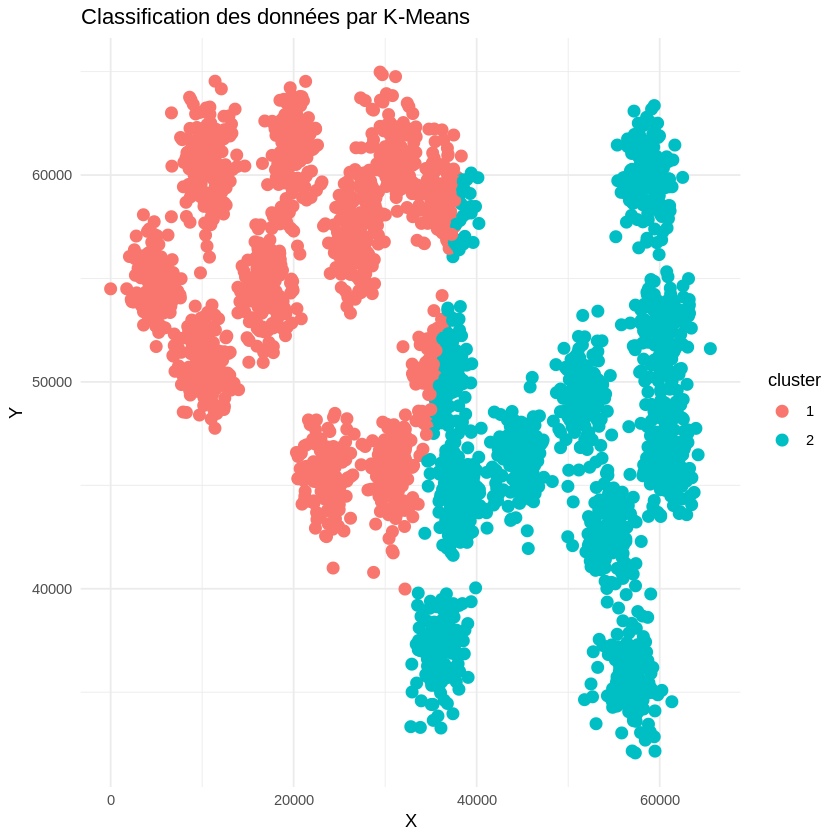

In [35]:
# prompt: apply kmans and plot

# 2. Appliquer K-Means avec 2 clusters
kmeans_result <- kmeans(donnees, centers = k_optimal)

# 3. Ajouter la colonne 'cluster'
donnees$cluster <- as.factor(kmeans_result$cluster)

# 4. Afficher les données colorées selon les clusters
ggplot(donnees, aes(x = X, y = Y, color = cluster)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle("Classification des données par K-Means ")

     X     Y
1 1.85 27.80
2 1.35 26.65
3 1.40 23.25
4 0.85 23.05
5 0.50 22.35
6 0.65 21.35
Largest jump is between merges 237 and 238 
→ Optimal number of clusters k = 3 


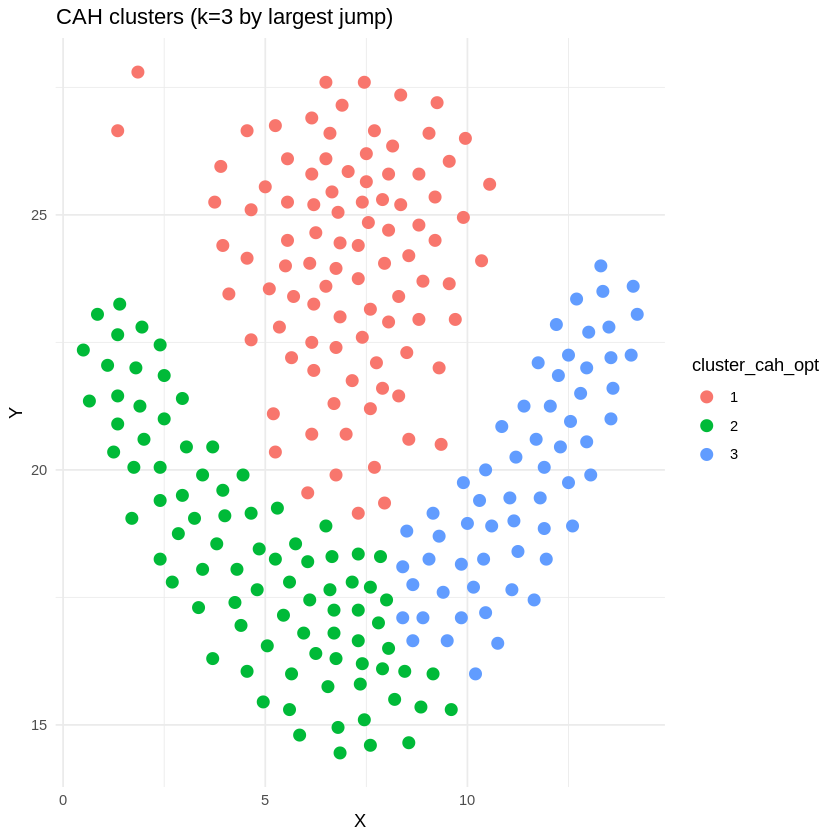

In [36]:
# 1) Read the data from the file (no header)
donnees <- read.table("flame.txt", header = FALSE)

# Manually assign column names for X and Y
colnames(donnees) <- c("X", "Y")

# Display the first few rows to check the data
print(head(donnees))

# 2) Compute the distance matrix using the X and Y columns
distance_matrix <- dist(donnees[, c("X", "Y")])

# Perform hierarchical clustering (CAH)
cah_result <- hclust(distance_matrix, method = "ward.D2")

# 3) Compute the jumps in merge heights
heights <- cah_result$height
height_diff <- diff(heights)  # Δ_i = h[i+1] - h[i]

# 4) Find the index of the largest jump
i_star <- which.max(height_diff)  # i* in 1:(n-2)

# 5) Compute optimal k (number of clusters)
n_obs <- nrow(donnees)  # n (total number of observations)
k_optimal <- n_obs - i_star  # Optimal number of clusters

cat("Largest jump is between merges", i_star, "and", i_star + 1, "\n")
cat("→ Optimal number of clusters k =", k_optimal, "\n")

# 6) Cut the tree into k_optimal clusters
clusters_opt <- cutree(cah_result, k = k_optimal)
donnees$cluster_cah_opt <- as.factor(clusters_opt)

# 7) Visualize the clustering result
library(ggplot2)
ggplot(donnees, aes(x = X, y = Y, color = cluster_cah_opt)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle(paste0("CAH clusters (k=", k_optimal, " by largest jump)"))


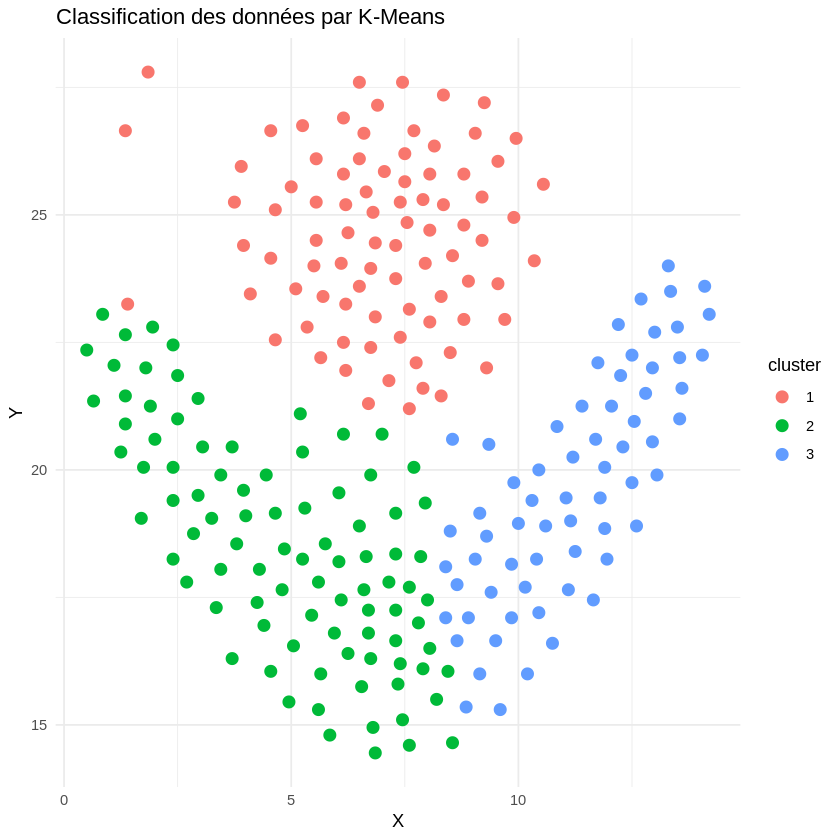

In [37]:
# prompt: apply kmans and plot

# 2. Appliquer K-Means avec 2 clusters
kmeans_result <- kmeans(donnees, centers = k_optimal)

# 3. Ajouter la colonne 'cluster'
donnees$cluster <- as.factor(kmeans_result$cluster)

# 4. Afficher les données colorées selon les clusters
ggplot(donnees, aes(x = X, y = Y, color = cluster)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle("Classification des données par K-Means ")

       X      Y
1 624474 837604
2 673412 735362
3 647442 677000
4 532283 741384
5 646529 742844
6 647535 755101
Largest jump is between merges 4997 and 4998 
→ Optimal number of clusters k = 3 


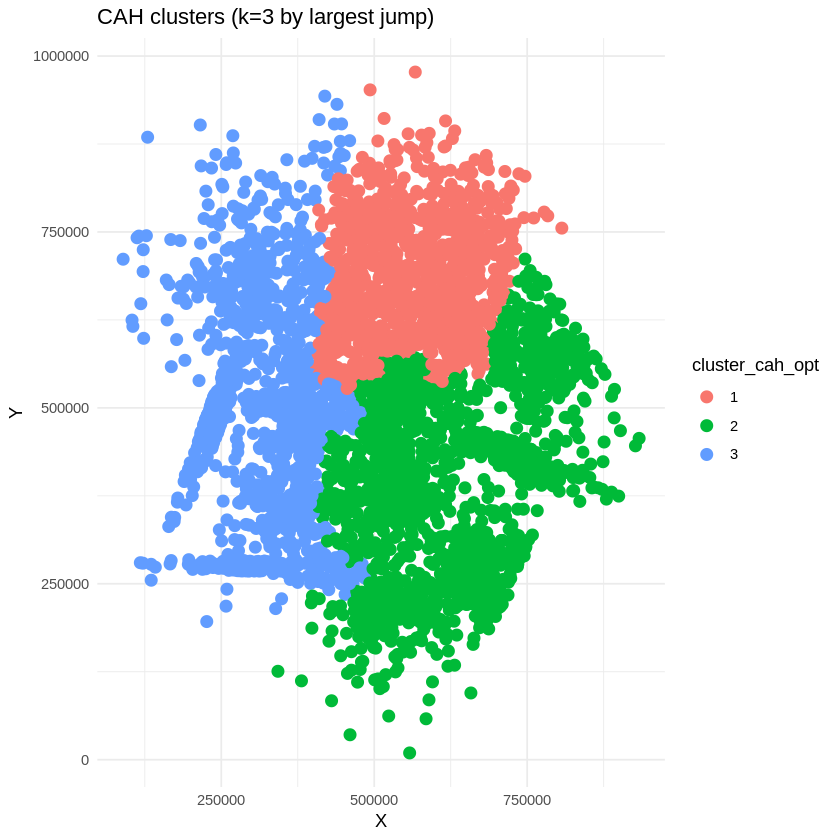

In [38]:
# 1) Read the data from the file (no header)
donnees <- read.table("s4.txt", header = FALSE)

# Manually assign column names for X and Y
colnames(donnees) <- c("X", "Y")

# Display the first few rows to check the data
print(head(donnees))

# 2) Compute the distance matrix using the X and Y columns
distance_matrix <- dist(donnees[, c("X", "Y")])

# Perform hierarchical clustering (CAH)
cah_result <- hclust(distance_matrix, method = "ward.D2")

# 3) Compute the jumps in merge heights
heights <- cah_result$height
height_diff <- diff(heights)  # Δ_i = h[i+1] - h[i]

# 4) Find the index of the largest jump
i_star <- which.max(height_diff)  # i* in 1:(n-2)

# 5) Compute optimal k (number of clusters)
n_obs <- nrow(donnees)  # n (total number of observations)
k_optimal <- n_obs - i_star  # Optimal number of clusters

cat("Largest jump is between merges", i_star, "and", i_star + 1, "\n")
cat("→ Optimal number of clusters k =", k_optimal, "\n")

# 6) Cut the tree into k_optimal clusters
clusters_opt <- cutree(cah_result, k = k_optimal)
donnees$cluster_cah_opt <- as.factor(clusters_opt)

# 7) Visualize the clustering result
library(ggplot2)
ggplot(donnees, aes(x = X, y = Y, color = cluster_cah_opt)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle(paste0("CAH clusters (k=", k_optimal, " by largest jump)"))


In [42]:
# Install if not yet installed
# install.packages("rgl")

# Load rgl
library(rgl)

# 1) Read data
donnees <- read.table("s4.txt", header = FALSE)
colnames(donnees) <- c("X", "Y")

# Add dummy Z if needed
donnees$Z <- 0

# 2) Distance and clustering
distance_matrix <- dist(donnees[, c("X", "Y")])
cah_result <- hclust(distance_matrix, method = "ward.D2")

# 3) Find jumps
heights <- cah_result$height
height_diff <- diff(heights)
i_star <- which.max(height_diff)
n_obs <- nrow(donnees)
k_optimal <- n_obs - i_star

clusters_opt <- cutree(cah_result, k = k_optimal)
donnees$cluster_cah_opt <- as.factor(clusters_opt)

# 3D Scatter plot with colors
colors <- rainbow(length(unique(donnees$cluster_cah_opt)))[donnees$cluster_cah_opt]

plot3d(donnees$X, donnees$Y, donnees$Z, col = colors, size = 8, type = "s")
title3d("CAH Clusters (3D view)", "X", "Y", "Z")


      X    Y
1 31.95 7.95
2 31.15 7.30
3 30.45 6.65
4 29.70 6.00
5 28.90 5.55
6 28.05 5.00
Largest jump is between merges 309 and 310 
→ Optimal number of clusters k = 3 


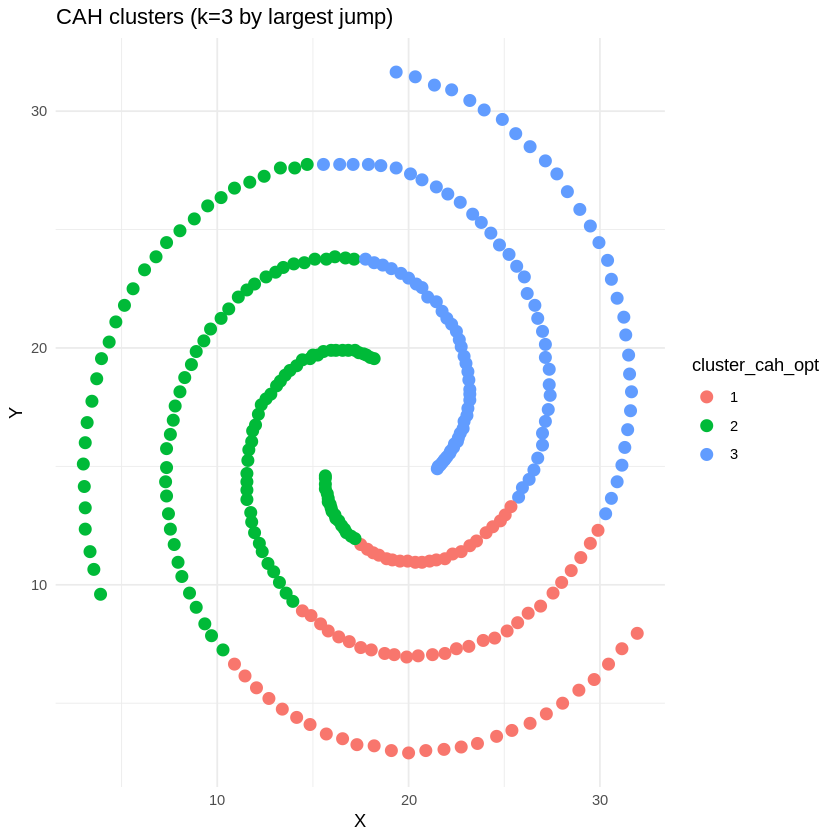

In [39]:
# 1) Read the data from the file (no header)
donnees <- read.table("spiral.txt", header = FALSE)

# Manually assign column names for X and Y
colnames(donnees) <- c("X", "Y")

# Display the first few rows to check the data
print(head(donnees))

# 2) Compute the distance matrix using the X and Y columns
distance_matrix <- dist(donnees[, c("X", "Y")])

# Perform hierarchical clustering (CAH)
cah_result <- hclust(distance_matrix, method = "ward.D2")

# 3) Compute the jumps in merge heights
heights <- cah_result$height
height_diff <- diff(heights)  # Δ_i = h[i+1] - h[i]

# 4) Find the index of the largest jump
i_star <- which.max(height_diff)  # i* in 1:(n-2)

# 5) Compute optimal k (number of clusters)
n_obs <- nrow(donnees)  # n (total number of observations)
k_optimal <- n_obs - i_star  # Optimal number of clusters

cat("Largest jump is between merges", i_star, "and", i_star + 1, "\n")
cat("→ Optimal number of clusters k =", k_optimal, "\n")

# 6) Cut the tree into k_optimal clusters
clusters_opt <- cutree(cah_result, k = k_optimal)
donnees$cluster_cah_opt <- as.factor(clusters_opt)

# 7) Visualize the clustering result
library(ggplot2)
ggplot(donnees, aes(x = X, y = Y, color = cluster_cah_opt)) +
  geom_point(size = 3) +
  theme_minimal() +
  ggtitle(paste0("CAH clusters (k=", k_optimal, " by largest jump)"))
